In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 9]

Optimal predicted p = 3.20
Maximum predicted acc = 48.33


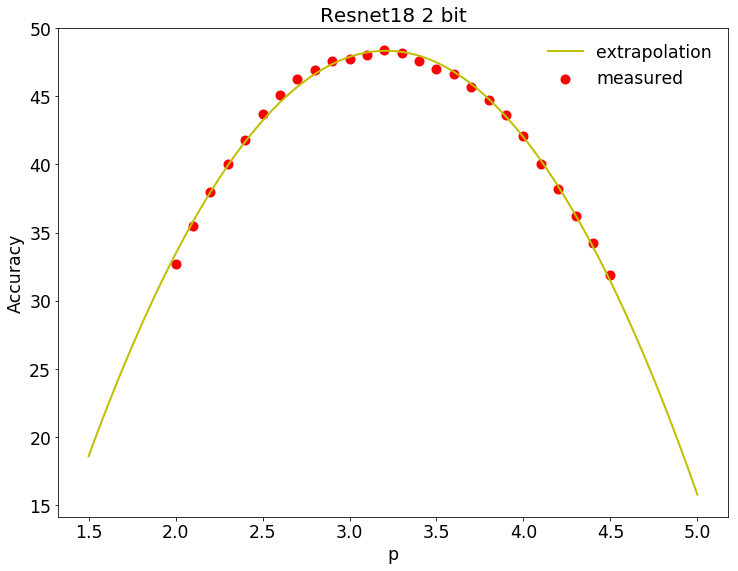

In [105]:
p = np.linspace(2, 4.5, 26)
acc = [32.7, 35.5, 38, 40, 41.8, 43.7, 45.1, 46.25, 46.9, 47.6, 47.74, 48, 48.4, 48.17, 47.57, 47, 46.6, 45.7, 44.74, 43.6, 42.1, 40, 38.2, 36.2, 34.2, 31.9]

_=plt.scatter(p, acc, linewidth=4, c='r')
plt.ylabel('Accuracy', size='xx-large')
plt.xlabel('p', size='xx-large')
plt.tick_params(axis='both', which='major', labelsize='xx-large')
plt.tick_params(axis='both', which='minor', labelsize='xx-large')
plt.title("Resnet18 2 bit", size=20)

z = np.polyfit(p, acc, 2)
y = np.poly1d(z)

xp = np.linspace(1.5, 5, 100)
plt.plot(xp, y(xp), '-', c='y', linewidth=2)
print("Optimal predicted p = {:.2f}".format(xp[y(xp).argmax()]))
print("Maximum predicted acc = {:.2f}".format(y(xp).max()))

_=plt.legend(['extrapolation', 'measured'], fontsize='xx-large', framealpha=0)

Optimal predicted p = 3.52
Maximum predicted acc = 45.83


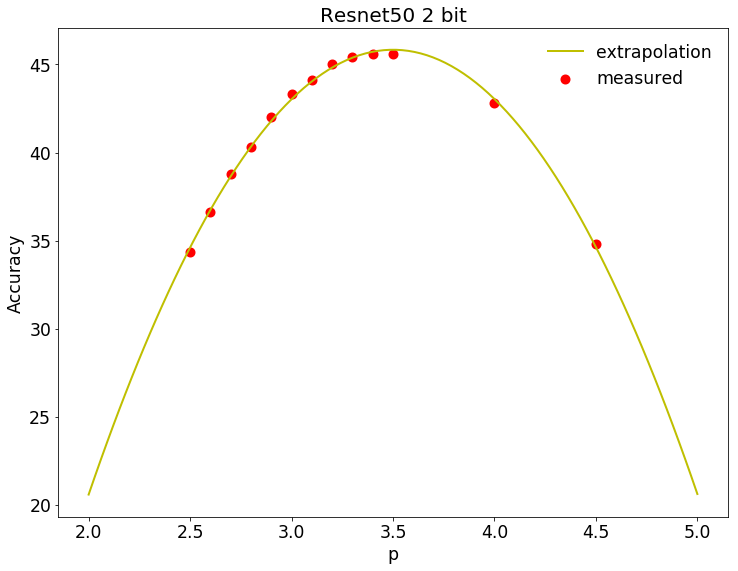

In [117]:
p = np.concatenate([np.linspace(2.5, 3.5, 11), [4, 4.5]])
acc = [34.35, 36.6, 38.8, 40.3, 42, 43.3, 44.1, 45, 45.4, 45.57, 45.57] + [42.8, 34.8]

_=plt.scatter(p, acc, linewidth=4, c='r')
plt.ylabel('Accuracy', size='xx-large')
plt.xlabel('p', size='xx-large')
plt.tick_params(axis='both', which='major', labelsize='xx-large')
plt.tick_params(axis='both', which='minor', labelsize='xx-large')
plt.title("Resnet50 2 bit", size=20)

z = np.polyfit(p, acc, 2)
y = np.poly1d(z)

xp = np.linspace(2, 5, 100)
plt.plot(xp, y(xp), '-', c='y', linewidth=2)
print("Optimal predicted p = {:.2f}".format(xp[y(xp).argmax()]))
print("Maximum predicted acc = {:.2f}".format(y(xp).max()))

_=plt.legend(['extrapolation', 'measured'], fontsize='xx-large', framealpha=0)

Optimal measured p = 3.00
Maximum measured acc = 74.87


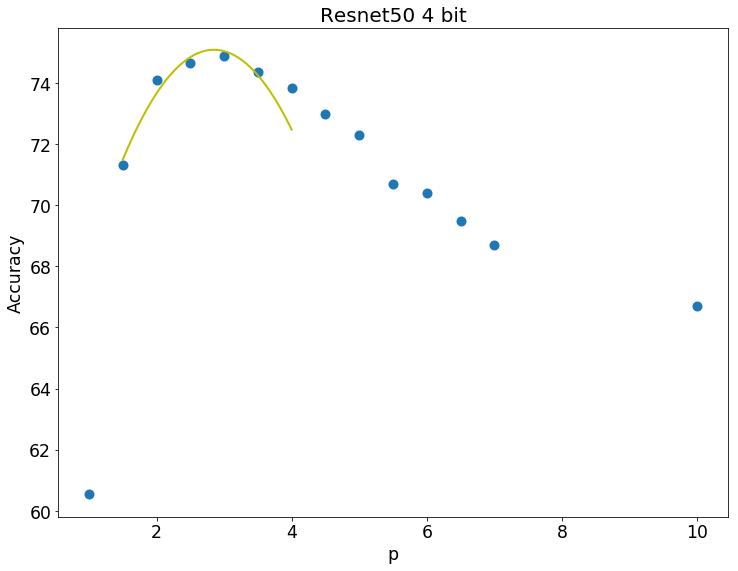

In [241]:
p = np.concatenate([[1, 1.5, 2], np.linspace(2.5, 4, 4), [4.5, 5, 5.5, 6, 6.5, 7, 10]])
acc = np.array([60.54, 71.3, 74.1]+ [74.64, 74.87, 74.37, 73.84] + [73, 72.3, 70.7, 70.4, 69.5, 68.7, 66.7])

_=plt.scatter(p, acc, linewidth=4)
plt.ylabel('Accuracy', size='xx-large')
plt.xlabel('p', size='xx-large')
plt.tick_params(axis='both', which='major', labelsize='xx-large')
plt.tick_params(axis='both', which='minor', labelsize='xx-large')
plt.title("Resnet50 4 bit", size=20)

opt_p = p[acc.argmax()]
opt_p_idx = acc.argmax()

z = np.polyfit(p[opt_p_idx-3:opt_p_idx+2], acc[opt_p_idx-3:opt_p_idx+2], 2)
y = np.poly1d(z)

xp = np.linspace(1.5, 4, 100)
plt.plot(xp, y(xp), '-', c='y', linewidth=2)
print("Optimal measured p = {:.2f}".format(opt_p))
print("Maximum measured acc = {:.2f}".format(acc.max()))

# _=plt.legend(['extrapolation', 'measured'], fontsize='xx-large', framealpha=0)

Optimal predicted p = 3.16
Maximum predicted acc = 71.03


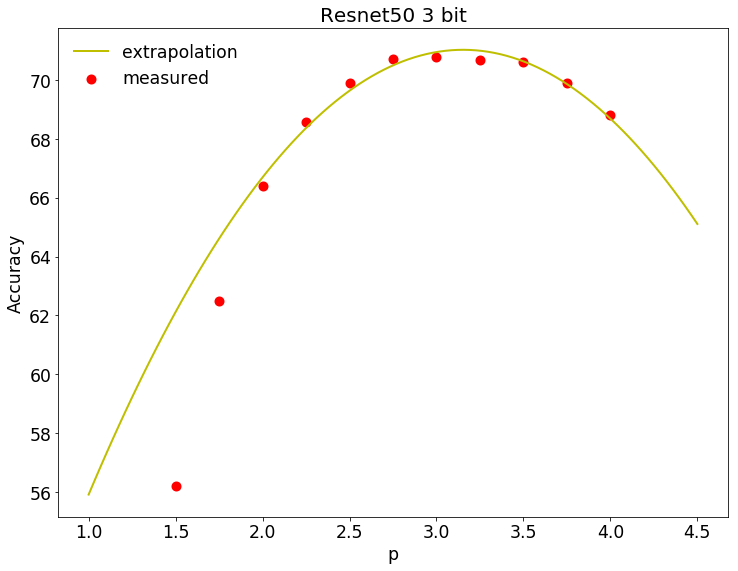

In [240]:
p = np.concatenate([np.linspace(1.5, 4, 11)])
acc = [56.2, 62.5, 66.4, 68.57, 69.9, 70.7, 70.8, 70.67, 70.6, 69.9, 68.8]

_=plt.scatter(p, acc, linewidth=4, c='r')
plt.ylabel('Accuracy', size='xx-large')
plt.xlabel('p', size='xx-large')
plt.tick_params(axis='both', which='major', labelsize='xx-large')
plt.tick_params(axis='both', which='minor', labelsize='xx-large')
plt.title("Resnet50 3 bit", size=20)

z = np.polyfit(p[2:], acc[2:], 2)
y = np.poly1d(z)

xp = np.linspace(1, 4.5, 100)
plt.plot(xp, y(xp), '-', c='y', linewidth=2)
print("Optimal predicted p = {:.2f}".format(xp[y(xp).argmax()]))
print("Maximum predicted acc = {:.2f}".format(y(xp).max()))

_=plt.legend(['extrapolation', 'measured'], fontsize='xx-large', framealpha=0)

In [250]:
np.linspace(1, 4, 13)

array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ,
       3.75, 4.  ])

Optimal predicted p = 1.83
Maximum predicted acc = 63.62


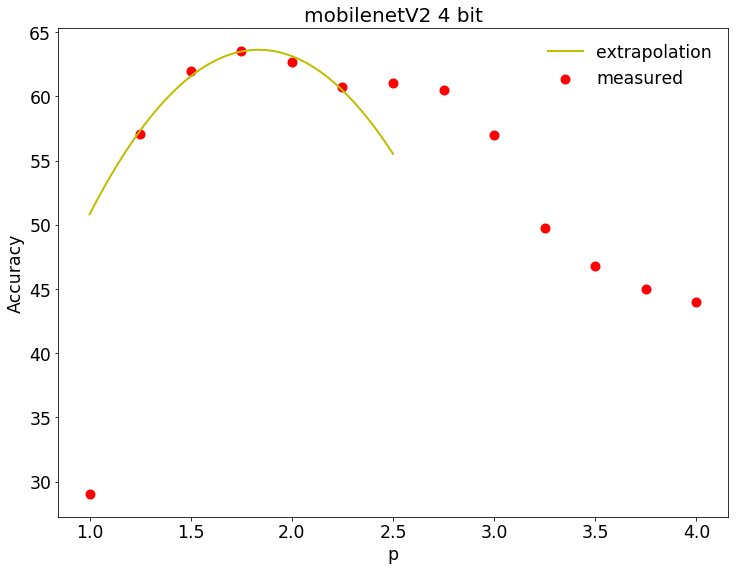

In [258]:
p = np.linspace(1, 4, 13)
acc = np.array([29, 57.1, 62, 63.5, 62.66, 60.7, 61, 60.5, 56.95, 49.77, 46.8, 45, 44])

_=plt.scatter(p, acc, linewidth=4, c='r')
plt.ylabel('Accuracy', size='xx-large')
plt.xlabel('p', size='xx-large')
plt.tick_params(axis='both', which='major', labelsize='xx-large')
plt.tick_params(axis='both', which='minor', labelsize='xx-large')
plt.title("mobilenetV2 4 bit", size=20)

z = np.polyfit(p[1:6], acc[1:6], 2)
y = np.poly1d(z)

xp = np.linspace(1, 2.5, 100)
plt.plot(xp, y(xp), '-', c='y', linewidth=2)
print("Optimal predicted p = {:.2f}".format(xp[y(xp).argmax()]))
print("Maximum predicted acc = {:.2f}".format(y(xp).max()))

_=plt.legend(['extrapolation', 'measured'], fontsize='xx-large', framealpha=0)

In [285]:
np.linspace(1.5, 4, 11)

array([1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  ])